In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('../data/Lena.png').astype(np.float32) / 255.
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

data = image_lab.reshape((-1, 3))

In [8]:
num_classes = 4
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.1)
_, labels, centers = cv2.kmeans(data, num_classes, None, 
                                criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

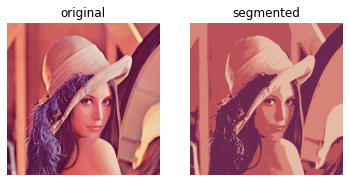

In [12]:
segmented_lab = centers[labels.flatten()].reshape(image.shape)
segmented = cv2.cvtColor(segmented_lab, cv2.COLOR_Lab2BGR)

plt.subplot(121)
plt.axis('off')
plt.title('original')
plt.imshow(image[:, :, [2,1,0]])

plt.subplot(122)
plt.axis('off')
plt.title('segmented')
plt.imshow(segmented[:, :, [2, 1, 0]])
plt.show()